In [4]:
import importlib
import numpy as np

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

import gridify as gy
importlib.reload(gy)

import cluster_extraction as ce
importlib.reload(ce)

import dataset_generation as dg
importlib.reload(dg)



<module 'dataset_generation' from '/tf/databox-model/cluster-ambiguity/cambiguity/dataset_generation.py'>

In [2]:
X, y = load_digits(return_X_y=True)
X_tsne = TSNE(n_components=2).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


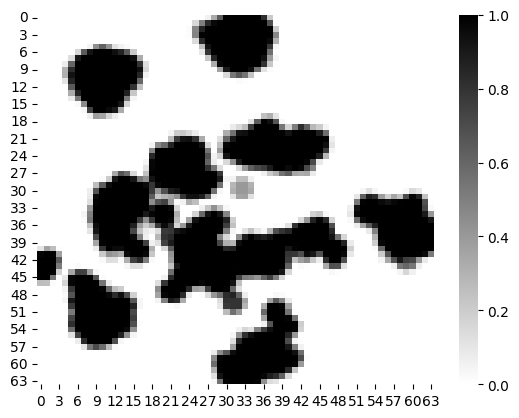

In [20]:
X_tsne_grid = gy.gridify(X_tsne, 0.2, 30, 1024, 64)
sns.heatmap(X_tsne_grid, cmap='binary')

plt.show()

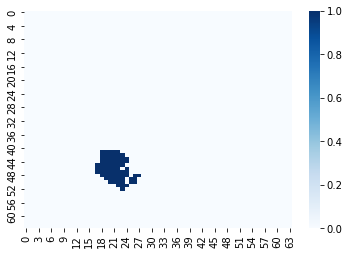

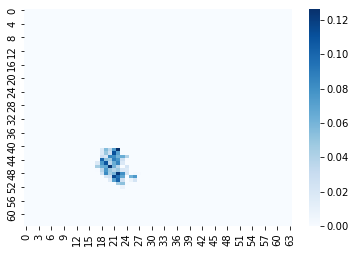

In [15]:
cluster = ce.cluster_extraction(X_tsne_grid, 0.3)
sns.heatmap(cluster, cmap='Blues')
plt.show()

cluster_grid = cluster * X_tsne_grid
sns.heatmap(cluster_grid, cmap="Blues")
plt.show()

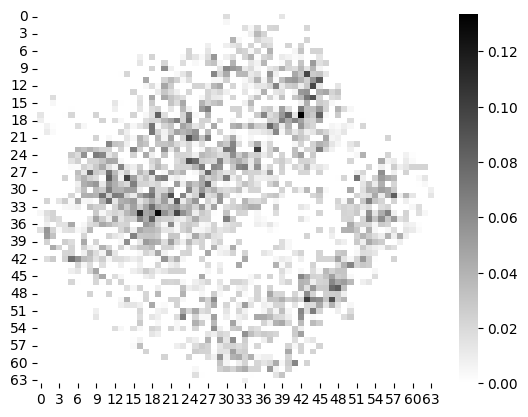

In [17]:
X_pca_grid = gy.gridify(X_pca, 0.2, 3, 1024, 64)
sns.heatmap(X_pca_grid, cmap='binary')

plt.show()

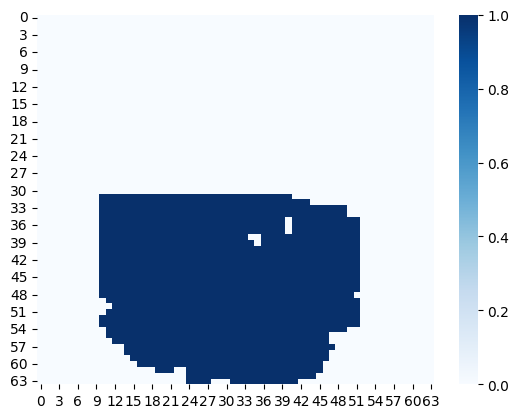

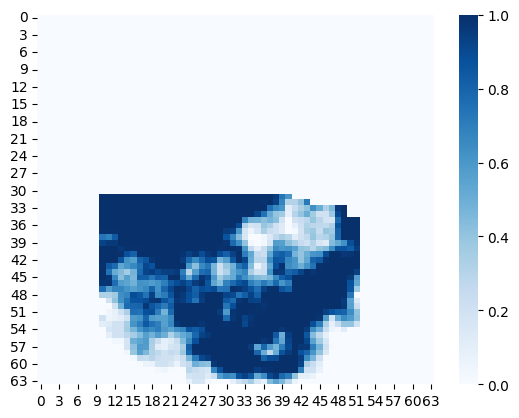

In [16]:
cluster = ce.cluster_extraction(X_pca_grid, 0.3)
sns.heatmap(cluster, cmap='Blues')
plt.show()

cluster_grid = cluster * X_pca_grid
sns.heatmap(cluster_grid, cmap="Blues")
plt.show()

In [21]:
dg.generate_random_clusters(
    data=X_tsne, 
    data_name="digitstsne",
    opacity=0.2,
    radius=15,
    pixel_size=1024,
    grid_size=64,
    walk_num_ratio=0.3,
    cluster_num=10000,
    path="random_clusters"
)

dg.generate_random_clusters(
    data=X_pca, 
    data_name="digitspca",
    opacity=0.2,
    radius=15,
    pixel_size=1024,
    grid_size=64,
    walk_num_ratio=0.3,
    cluster_num=10000,
    path="random_clusters"
)

100%|██████████| 10000/10000 [04:56<00:00, 33.70it/s]
